# Social Media Analytics | Module 7 Assignment | Paras Ahuja

## Objective

Our main objective for this assignment perform descriptive analytics on twitter dataset. This is a classfication dataset with class label identifying an account as either human or bot. We start by loading the libraries that we will be using throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Now that we have our libraries, we can import data as pandas dataframe.

In [2]:
t = pd.read_csv('twitter.csv')
t.head()

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,False,False,4,1589,4,False,787000000000000000.000,en,unknown,11041,False,7.870,1403,bot
1,False,False,536,860,880,False,796000000000000000.000,en,Estados Unidos,252,False,0.183,1379,human
2,False,False,3307,172,594,True,876000000000000000.000,en,"Los Angeles, CA",1001,False,0.864,1159,human
3,True,False,8433,517,633,True,756000000000000000.000,en,"Birmingham, AL",1324,False,0.889,1489,human
4,False,False,88,753678,116,True,464781334.000,en,"England, United Kingdom",4202,True,1.339,3138,human


We can modify some of this data, for instance the true/false columns can be turned into 1/0, and likewise for account_type, which is our classification label. We may even drop some of these columns in an attempt to reduce the deminsionality. Let's find out the size of the dataset.

In [3]:
print("Rows: {}\nColumns: {}".format(t.shape[0], t.shape[1]))

Rows: 37438
Columns: 14


Next let's find out some information about the dataset, and the features.

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   default_profile         37438 non-null  bool   
 1   default_profile_image   37438 non-null  bool   
 2   favorites_count         37438 non-null  int64  
 3   followers_count         37438 non-null  int64  
 4   friends_count           37438 non-null  int64  
 5   geo_enabled             37438 non-null  bool   
 6   id                      37438 non-null  float64
 7   lang                    29481 non-null  object 
 8   location                37435 non-null  object 
 9   statuses_count          37438 non-null  int64  
 10  verified                37438 non-null  bool   
 11  average_tweets_per_day  37438 non-null  float64
 12  account_age_days        37438 non-null  int64  
 13  account_type            37438 non-null  object 
dtypes: bool(4), float64(2), int64(5), obje

We notice here that there are a few bool Dtype in our data set, and the rest are either int64, float64, or object. However, we can also change account_type to bool. Next, let's check if there are any missing values in our dataset.

In [5]:
t.isnull().sum()

default_profile              0
default_profile_image        0
favorites_count              0
followers_count              0
friends_count                0
geo_enabled                  0
id                           0
lang                      7957
location                     3
statuses_count               0
verified                     0
average_tweets_per_day       0
account_age_days             0
account_type                 0
dtype: int64

We have quite a few missing values in lang feature and only 3 missing location data. In order to fill missing values, we can curate a list of languages and countries where the languages are spoken accounting for most commonly spoken language in the nation. Then, if a the location, we can simply fill the language accordingly - this is assuming that we have all the location data that we need.

In [6]:
t.lang.unique()

array(['en', 'ar', nan, 'so', 'it', 'es', 'fr', 'id', 'pt', 'ja', 'zh-cn',
       'de', 'lt', 'ru', 'tl', 'af', 'cy', 'tr', 'vi', 'ca', 'no', 'hu',
       'sw', 'ko', 'fa', 'el', 'sl', 'et', 'pl', 'fi', 'ro', 'nl', 'da',
       'sk', 'bg', 'sv', 'mk', 'hr', 'th', 'sq', 'cs', 'ur', 'hi', 'lv',
       'he', 'zh-tw', 'ne', 'uk', 'pa'], dtype=object)

In [7]:
t.loc[pd.isnull(t.lang)]

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
8,True,False,64,24,0,False,1015021614.000,NaN,unknown,277,False,0.099,2802,human
19,True,False,510,6,33,False,384565337.000,NaN,unknown,639,False,0.197,3242,bot
40,False,False,722,1300,1137,True,235667666.000,NaN,unknown,70176,False,19.993,3510,human
42,False,False,2896,338,743,True,2499018968.000,NaN,unknown,7167,False,3.135,2286,human
47,False,False,1325,25,851,False,51904755.000,NaN,unknown,1807,False,0.444,4069,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37412,False,False,1432,93,199,True,179830629.000,NaN,"Trabzon, Türkiye",1812,False,0.496,3654,human
37415,True,True,222,2,19,False,713293693.000,NaN,unknown,58,False,0.020,2948,bot
37420,False,False,2465,114,70,True,108003230.000,NaN,Salvador,5799,False,1.503,3859,bot
37422,True,False,1368,6,170,False,1556873126.000,NaN,unknown,2056,False,0.789,2607,bot


It appears that we will not be able to use the location data to fill in language because we have many instances of location marked as unknown. Let's find out how many such instances are there.

In [8]:
print("Missing location data marked as 'unknown': {}".format(t.loc[t.location == 'unknown'].count()[8]))

Missing location data marked as 'unknown': 13023


This just too many pieces of missing information. Even if we decided to salvage some of this data, will still have roughly 5000 instances where we do not have any information. In this instances our options are to either drop these columns because we cannot impute this information in any meaningful way or drop the rows with missing values after having salvaged some information.

In [9]:
print("Missing location data marked as 'unknown and bots': {}".format(t.loc[(t.location == 'unknown') & (t["account_type"] == "bot")].count()[8]))

Missing location data marked as 'unknown and bots': 6254


In [10]:
print("Missing location data not marked as 'unknown and bots': {}".format(t.loc[(t.location != 'unknown') & (t["account_type"] == "bot")].count()[8]))

Missing location data not marked as 'unknown and bots': 6170


In [11]:
t.loc[(t.location != 'unknown') & (t["account_type"] == "bot")]

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
5,True,False,237,27394,542,False,801000000000000000.000,ar,مكة المكرمة,11513,False,8.428,1366,bot
26,True,False,307,3745,2,False,932000000000000000.000,en,The Internet,2371,False,2.362,1004,bot
31,False,False,2361,64,156,True,381157528.000,en,"Hollywood, Los Angeles",2780,False,0.856,3248,bot
44,False,False,2583,108,0,False,23331044.000,id,iowa! nothing but corn:),5626,False,1.346,4181,bot
49,False,False,253,317,413,True,2918711542.000,it,"Florencia, Toscana",3110,False,1.498,2076,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,True,False,970,19,0,True,24116929.000,en,Scotland,1418,False,0.339,4177,bot
37403,True,False,252,12,21,False,350748440.000,NaN,tn,597,False,0.181,3299,bot
37418,False,False,1,8,0,False,1070000000000000000.000,en,"Helsinki, Finland",611,False,0.998,612,bot
37420,False,False,2465,114,70,True,108003230.000,NaN,Salvador,5799,False,1.503,3859,bot


In [12]:
len(t.loc[(pd.isnull(t.lang)) & (t.location != 'unknown')].location.unique())

2242

There are 2242 unique locations where we do not have language data provided and have location. We will drop lang, and location columns.

In [13]:
t = t.drop(columns=['lang', 'location'])

In [14]:
t.describe()

,favorites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000,37438.000,37438.000,37438.000,37438.000,37438.000,37438.000
mean,12302.062,370309.830,4445.925,122148512894491104.000,21073.387,6.892,3022.128
std,33923.650,2470829.491,49545.202,300418030375024576.000,67329.771,24.580,1013.696
min,0.000,0.000,0.000,418.000,0.000,0.000,483.000
25%,362.000,35.000,37.000,99573057.500,1336.250,0.495,2316.250
50%,2066.000,365.000,296.000,399147423.500,4209.000,1.488,3219.000
75%,8879.000,8440.250,893.000,2453825953.250,17153.750,5.528,3888.000
max,885123.000,121641473.000,4343060.000,1120000000000000000.000,2771910.000,1269.055,5158.000


We have maximum average tweets per day of 1269.055000. That is simply too many tweets! However, mean average tweets per day is 6.89. Let's find out whether this maximum tweeter is a bot or a human. However, before checking we can expect that this is most likely a bot.

In [15]:
t.loc[t['average_tweets_per_day'] == 1269.055000]

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
37226,False,False,45,15,2,False,913000000000000000.000,1340122,False,1269.055,1056,bot


As we can see that the account is clearly a bot.

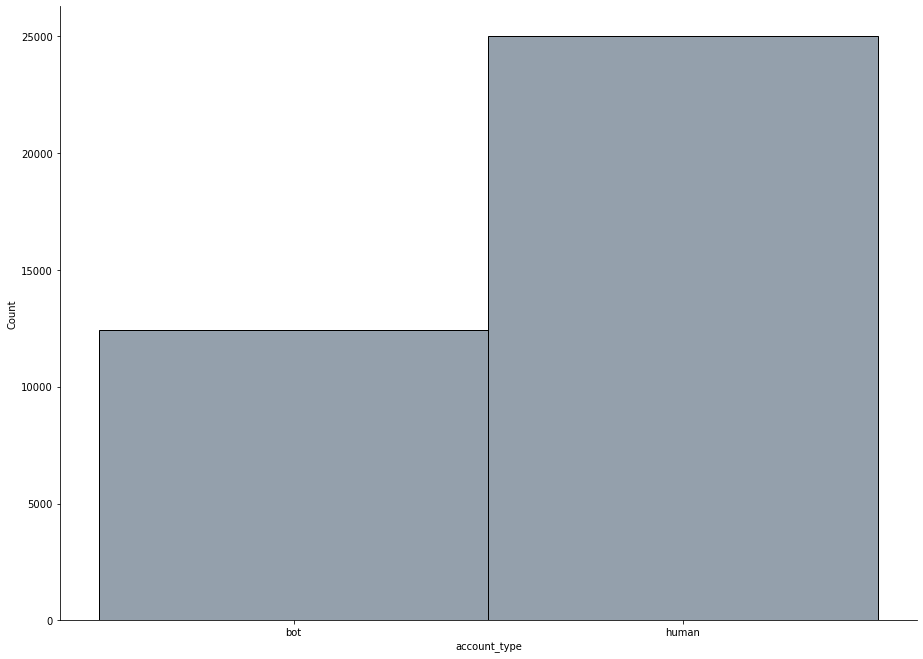

In [16]:
ax = sns.displot(t, x='account_type', color="slategrey")
ax.fig.set_size_inches(15,10)

We notice that we twice as many humans as bots. One thing that would be interesting to find out, is the outreach of bots vs humans. We have three features that can tell us of this - favorites_count, followers_count, and friends_count.

In [17]:
t.loc[(t['account_type'] == 'bot')]['favorites_count'].mean()

4483.1367404426555

In [18]:
t.loc[(t['account_type'] == 'human')]['favorites_count'].mean()

16186.048454803502

Humans have more favorites count that bots.

In [19]:
t.loc[(t['account_type'] == 'bot')]['followers_count'].mean()

73500.2738028169

In [20]:
t.loc[(t['account_type'] == 'human')]['followers_count'].mean()

517747.5122536281

Humans also have more followers count.

In [21]:
t.loc[(t['account_type'] == 'bot')]['friends_count'].mean()

4925.660442655935

In [22]:
t.loc[(t['account_type'] == 'human')]['friends_count'].mean()

4207.620677247831

Bots have more friends count.

In [24]:
t.head()

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,False,False,4,1589,4,False,787000000000000000.000,11041,False,7.870,1403,bot
1,False,False,536,860,880,False,796000000000000000.000,252,False,0.183,1379,human
2,False,False,3307,172,594,True,876000000000000000.000,1001,False,0.864,1159,human
3,True,False,8433,517,633,True,756000000000000000.000,1324,False,0.889,1489,human
4,False,False,88,753678,116,True,464781334.000,4202,True,1.339,3138,human
